[8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]


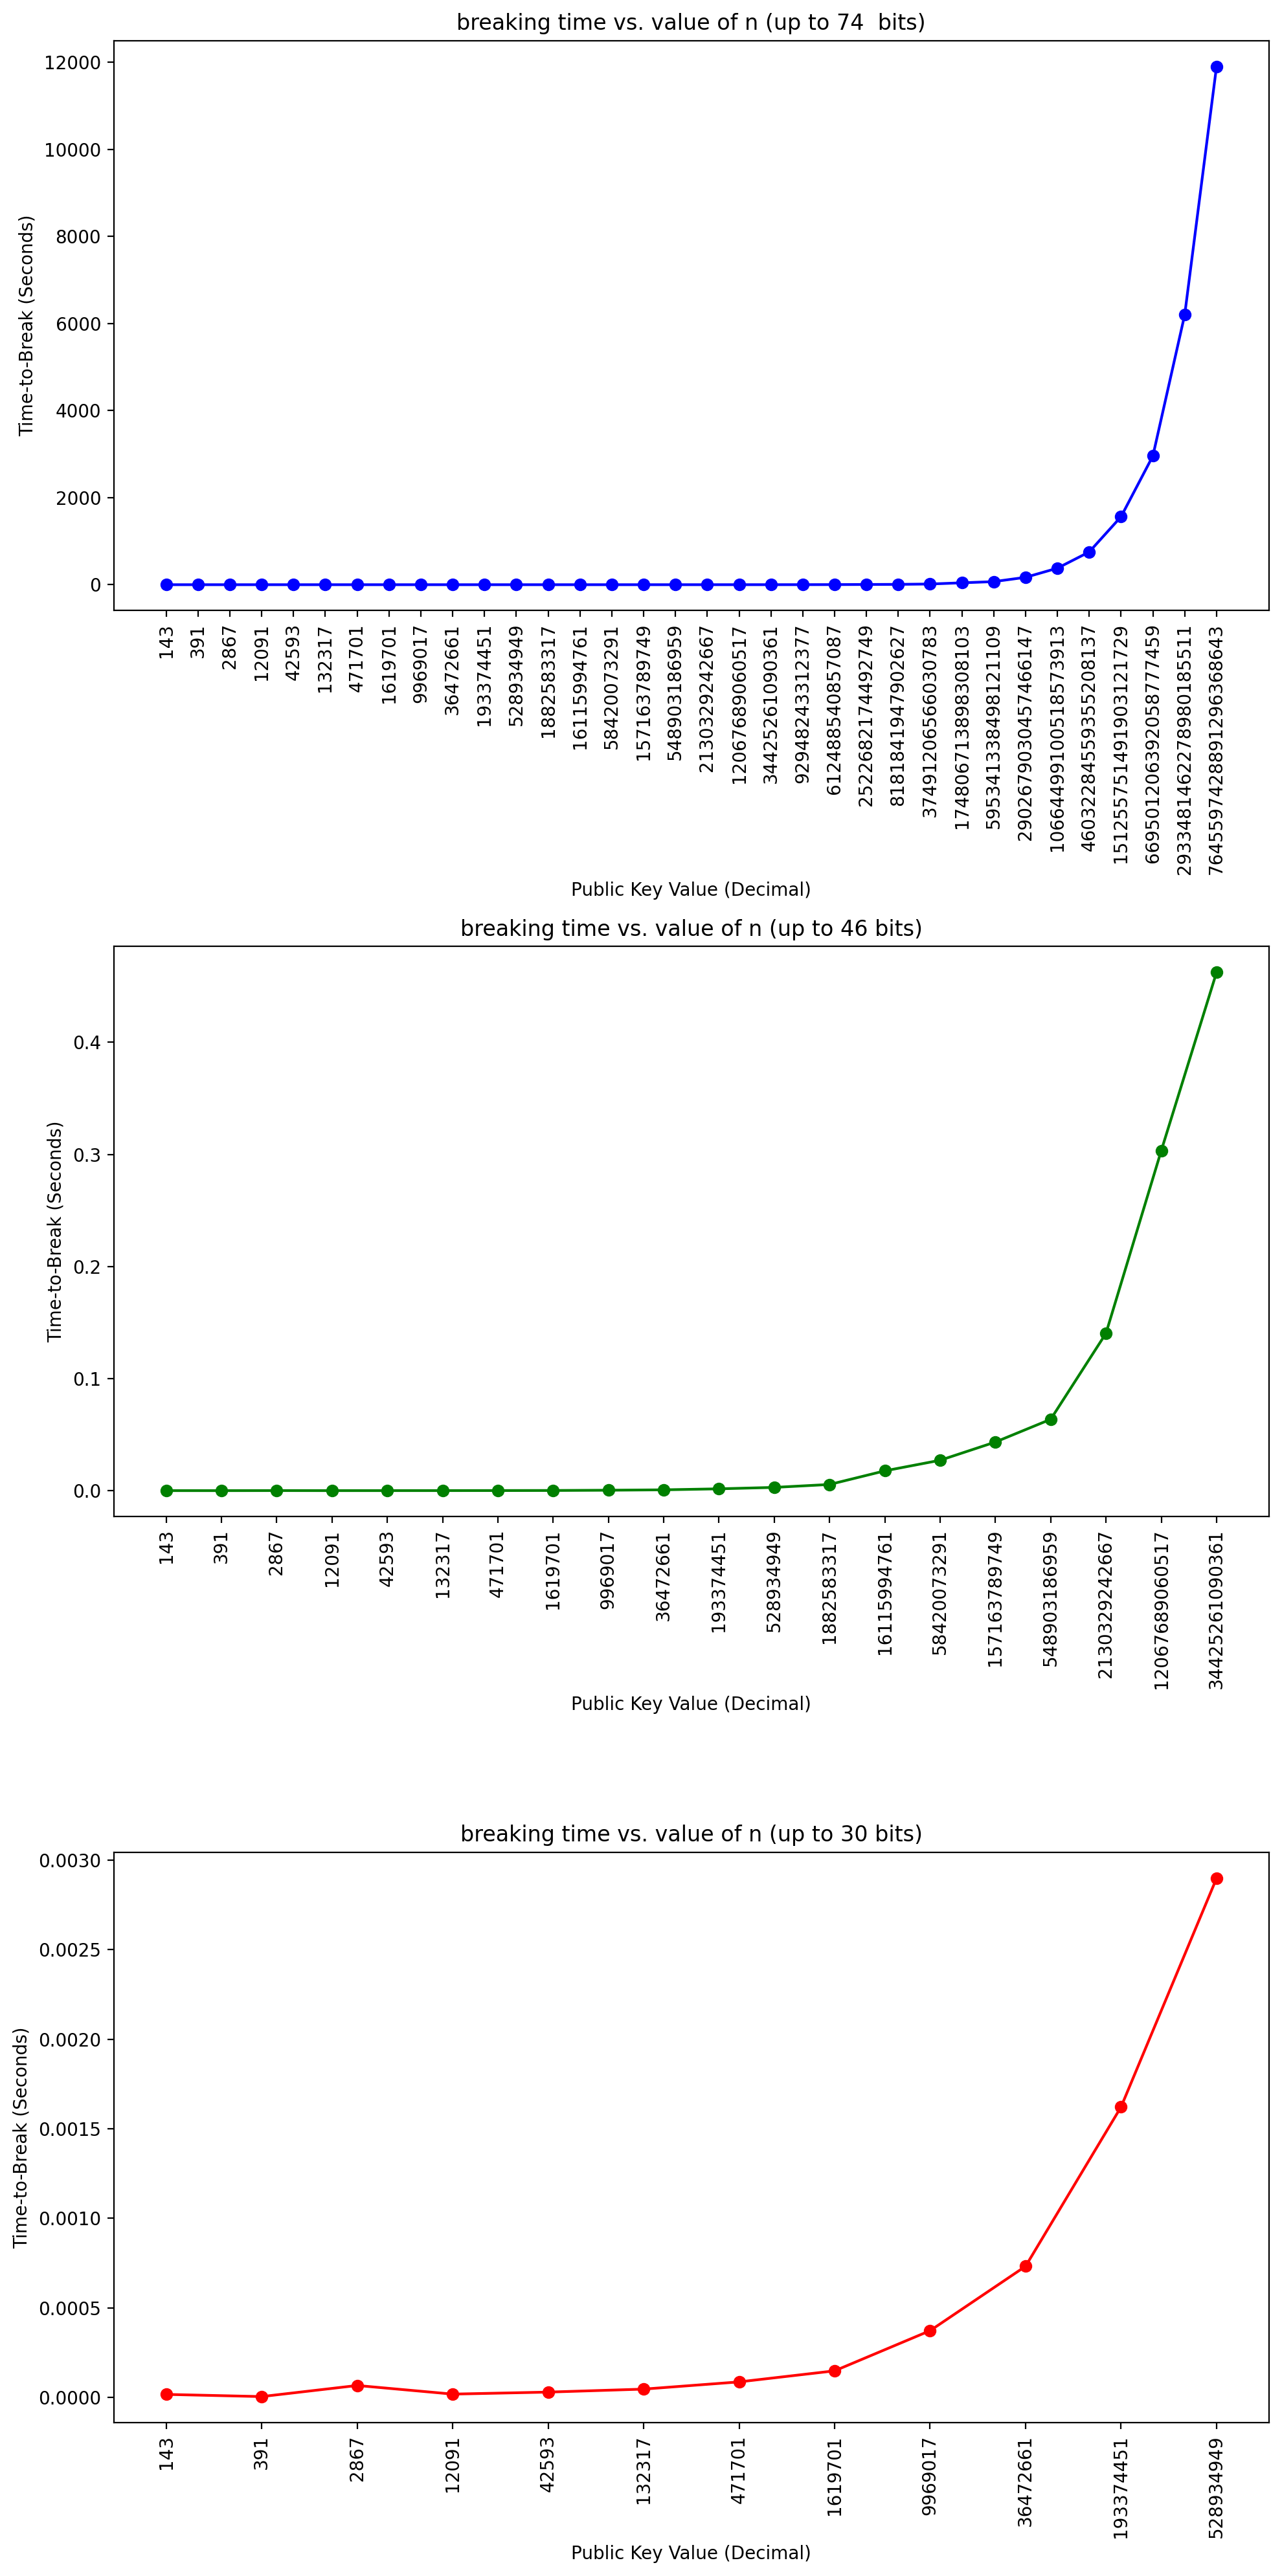

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

def factorize(n):
   if (n % 2) == 0:
      return [2] + factorize(n//2)
   
   integer = 3
   while integer <= (n**0.5):     
      if n % integer == 0:      
         return [integer] + factorize(n // integer)
      else:
         integer += 2                        # Since all primes are odd.
   return [n]


def mathematical_attack(PU):
   factors = factorize(PU)
   return "NOT RSA" if len(factors) > 2  else factors


PUs = np.load('./n.npy', allow_pickle=True)


file_object = open('time.txt', 'a', buffering=1)
file_object2 = open('ns.txt', 'a', buffering=1)
if False:
   for PU in PUs:
      start = time.time()
      factorize(PU)
      end = time.time()
      file_object.write(f'{end-start} \n')
      file_object2.write(f'{PU} \n')



file_object.close()


times = []
with open('time.txt') as infile:
    lines = infile.readlines()
    for line in lines:
       times.append(float(line[:-2]))
times = np.array(times)

n_size = [2*i+8 for i in range(len(PUs))]
n_size = n_size[:34]

print(n_size)
fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=200, figsize=(10,20))
def add_subplot(ax, max_n, color, title):
   ax.scatter(list(range(max_n)), times[:max_n], color=color)
   ax.plot(list(range(max_n)), times[:max_n], color=color)
   ax.set_xticks(list(range(len(PUs[:max_n]))), minor=False)
   ax.set_xticklabels(PUs[:max_n], fontdict=None, minor=False, rotation='90')
   ax.set_xlabel('Public Key Value (Decimal)')
   ax.set_ylabel('Time-to-break (Seconds)')
   ax.title.set_text(title)
   fig.tight_layout()

add_subplot(ax1, 34, 'b', f'breaking time vs. value of n (up to {n_size[33]}  bits)')
add_subplot(ax2, 20, 'g', f'breaking time vs. value of n (up to {n_size[19]} bits)')
add_subplot(ax3, 12, 'r', f'breaking time vs. value of n (up to {n_size[11]} bits)')

